In [1]:
import pandas as pd
import numpy as np
from dtg_utils import *
from draw_1_hop import *

In [2]:
pbmc_embedding = pd.read_csv('../../results/data/singleCell/pbmc_rna/PBMC_all.emb',
                                    sep=' ',
                                    skiprows=1,
                                    header=None,
                                    index_col=0)

In [3]:
pbmc_index = pd.read_csv('../../results/data/singleCell/pbmc_rna/splitMatrix/index_tracker.tsv',
                                sep='\t')

findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans.


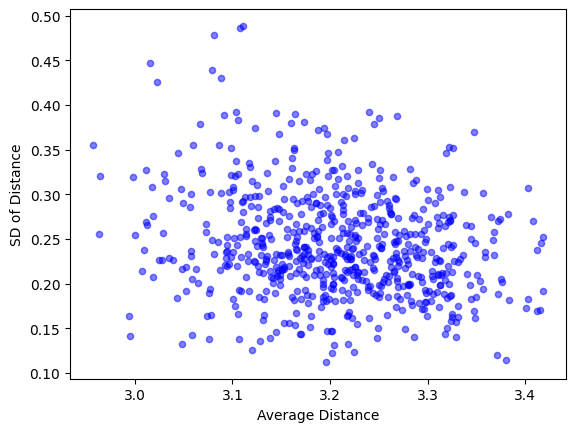

In [4]:
pbmc_distance = cal_node_distances(pbmc_index, pbmc_embedding)

In [5]:
pbmc_distance.to_csv('../../results/result2/pbmc_all_distance.txt', sep='\t', index=False)

In [6]:
pbmc_distance

,Unnamed: 0,CD14.Mono,25_NK,CD4.N,22_CD4.M,17_B,23_CD8.EM,24_CD8.CM,10_cDC,09_pDC,18_Plasma,distance_avg,distance_sd
2,IGLL5,3,2003,4003,6003,8003,10003,12003,14003,16003,18003,3.165651,0.290021
5,DERL3,6,2006,4006,6006,8006,10006,12006,14006,16006,18006,3.124165,0.259971
8,HLA-DQA1,9,2009,4009,6009,8009,10009,12009,14009,16009,18009,3.171240,0.231398
20,SEC11C,21,2021,4021,6021,8021,10021,12021,14021,16021,18021,3.316213,0.188803
22,GNLY,23,2023,4023,6023,8023,10023,12023,14023,16023,18023,3.186405,0.252380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,VEGFB,1984,3984,5984,7984,9984,11984,13984,15984,17984,19984,3.276813,0.148782
1985,CSTB,1986,3986,5986,7986,9986,11986,13986,15986,17986,19986,3.275193,0.236486
1990,PARP1,1991,3991,5991,7991,9991,11991,13991,15991,17991,19991,3.258040,0.164592
1991,ADAM8,1992,3992,5992,7992,9992,11992,13992,15992,17992,19992,3.299474,0.305536


In [7]:
edgelist_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/data/singleCell/pbmc_rna/PBMC_all.edgelist'
edgelist = pd.read_csv(edgelist_path, sep='\t', header=None)
edgelist_list = edgelist.iloc[:, :2].stack().unique().tolist()

#get_k_hop_structure(edgelist_path, 5387, output_path)
#rows_index_list = [row[0:11].tolist() for index, row in filter_pbmc_distance_mean_sort.iterrows()]

In [ ]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/single_cell/pbmc/avr_dtgs/'
filter_pbmc_distance_mean_sort = pbmc_distance.sort_values('distance_avg', ascending = False)
rows_index_list = [row[0:11].tolist() for index, row in filter_pbmc_distance_mean_sort.head(10).iterrows()]

for index_list in rows_index_list:
    batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)


In [ ]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/single_cell/pbmc/sd_dtgs/'
filter_pbmc_distance_sd_sort = pbmc_distance.sort_values('distance_sd', ascending = False)
rows_index_list = [row[0:11].tolist() for index, row in filter_pbmc_distance_sd_sort.head(5).iterrows()]

for index_list in rows_index_list:
    batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)

In [13]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/single_cell/pbmc/'
egr = pbmc_distance[pbmc_distance['Unnamed: 0'] == 'S100A4'].values.tolist()[0]
batch_plot_1_hop(edgelist_path,egr[1:],output_path,egr[0], edgelist_list)

2.9566617271267335
0.3549680111945645
